In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# reading dataset

In [165]:
df = pd.read_csv('heart.csv')

In [166]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [167]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Attribute Information:

1. age
2. sex (1= Male, 0= Female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [168]:
df.shape

(1025, 14)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [170]:
df.oldpeak.unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [171]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# eda

In [172]:
df['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

<Axes: xlabel='sex'>

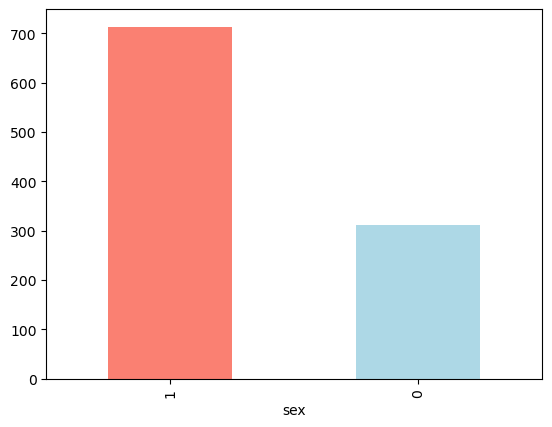

In [173]:
df['sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

Out of 1025 records, 713 records are of males and 312 records are of females

In [174]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

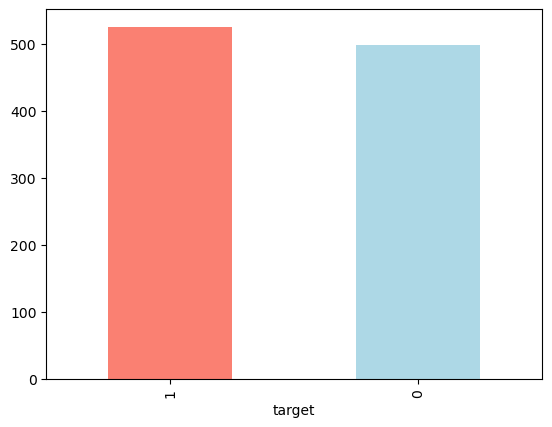

In [175]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

Out of 1025 records, 526 records are positive(having disease) and 499 records are negative(doesn't have disease)

In [176]:
cat_values = [] 
conti_values = [] 
for col in df.columns:
    if len(df[col].unique()) >= 10:
        conti_values.append(col)
    else:
        cat_values.append(col)
print("catageroy values: ", cat_values)
print("continous values: ", conti_values)

catageroy values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


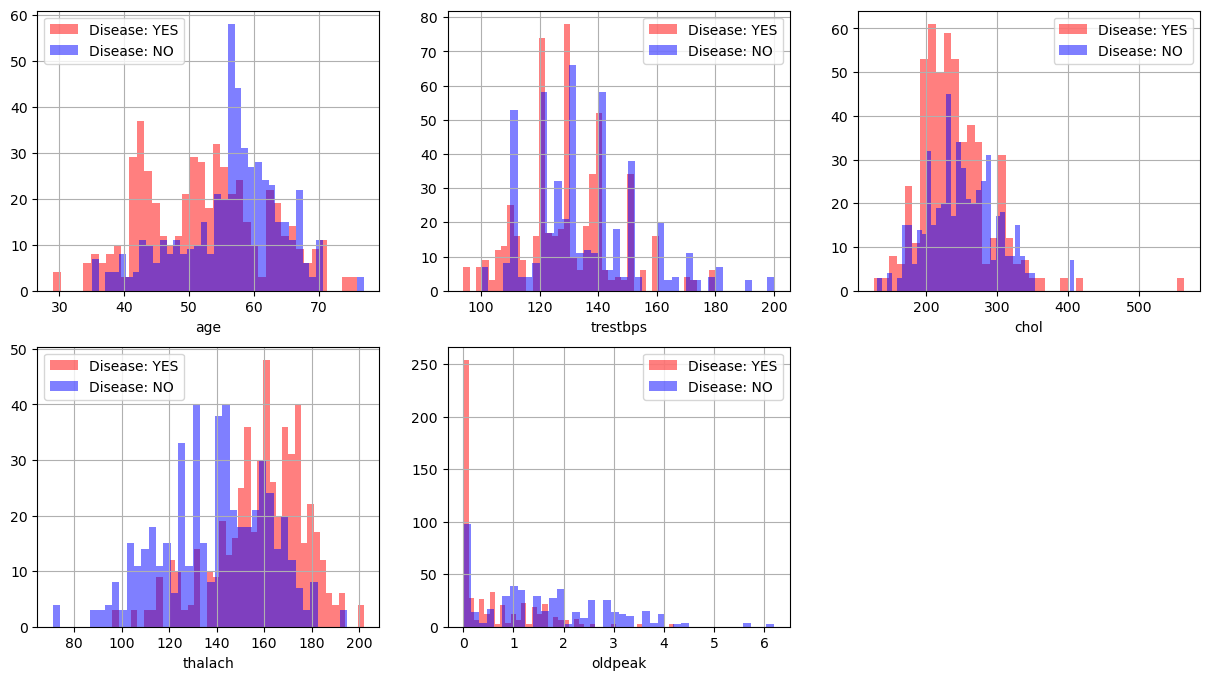

In [177]:
plt.figure(figsize=(15,8))

for i, col in enumerate(conti_values, 1):
    plt.subplot(2,3,i)
    df[df.target ==1][col].hist(bins=40, color='red', alpha=0.5,  label='Disease: YES')
    df[df.target ==0][col].hist(bins=40, color='blue', alpha=0.5,  label='Disease: NO')
    plt.xlabel(col)
    plt.legend()

Checking Correlation 

<Axes: >

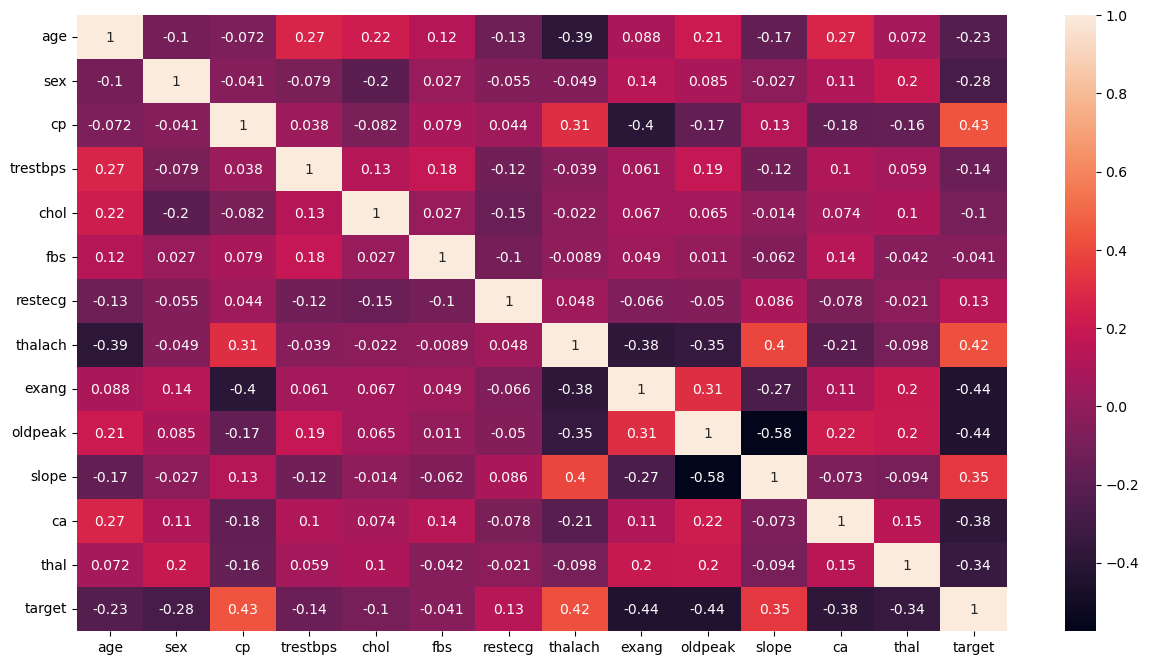

In [178]:
x = df.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(x, annot= True)

It is clearly visible that no column is a significant contributor among all the features.
So we are going to take all the features for the model evaluation.

In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


Outliers can be seen in various columns of the dataset. So moving onto the next method which is Boxplots for the better view of the outliers

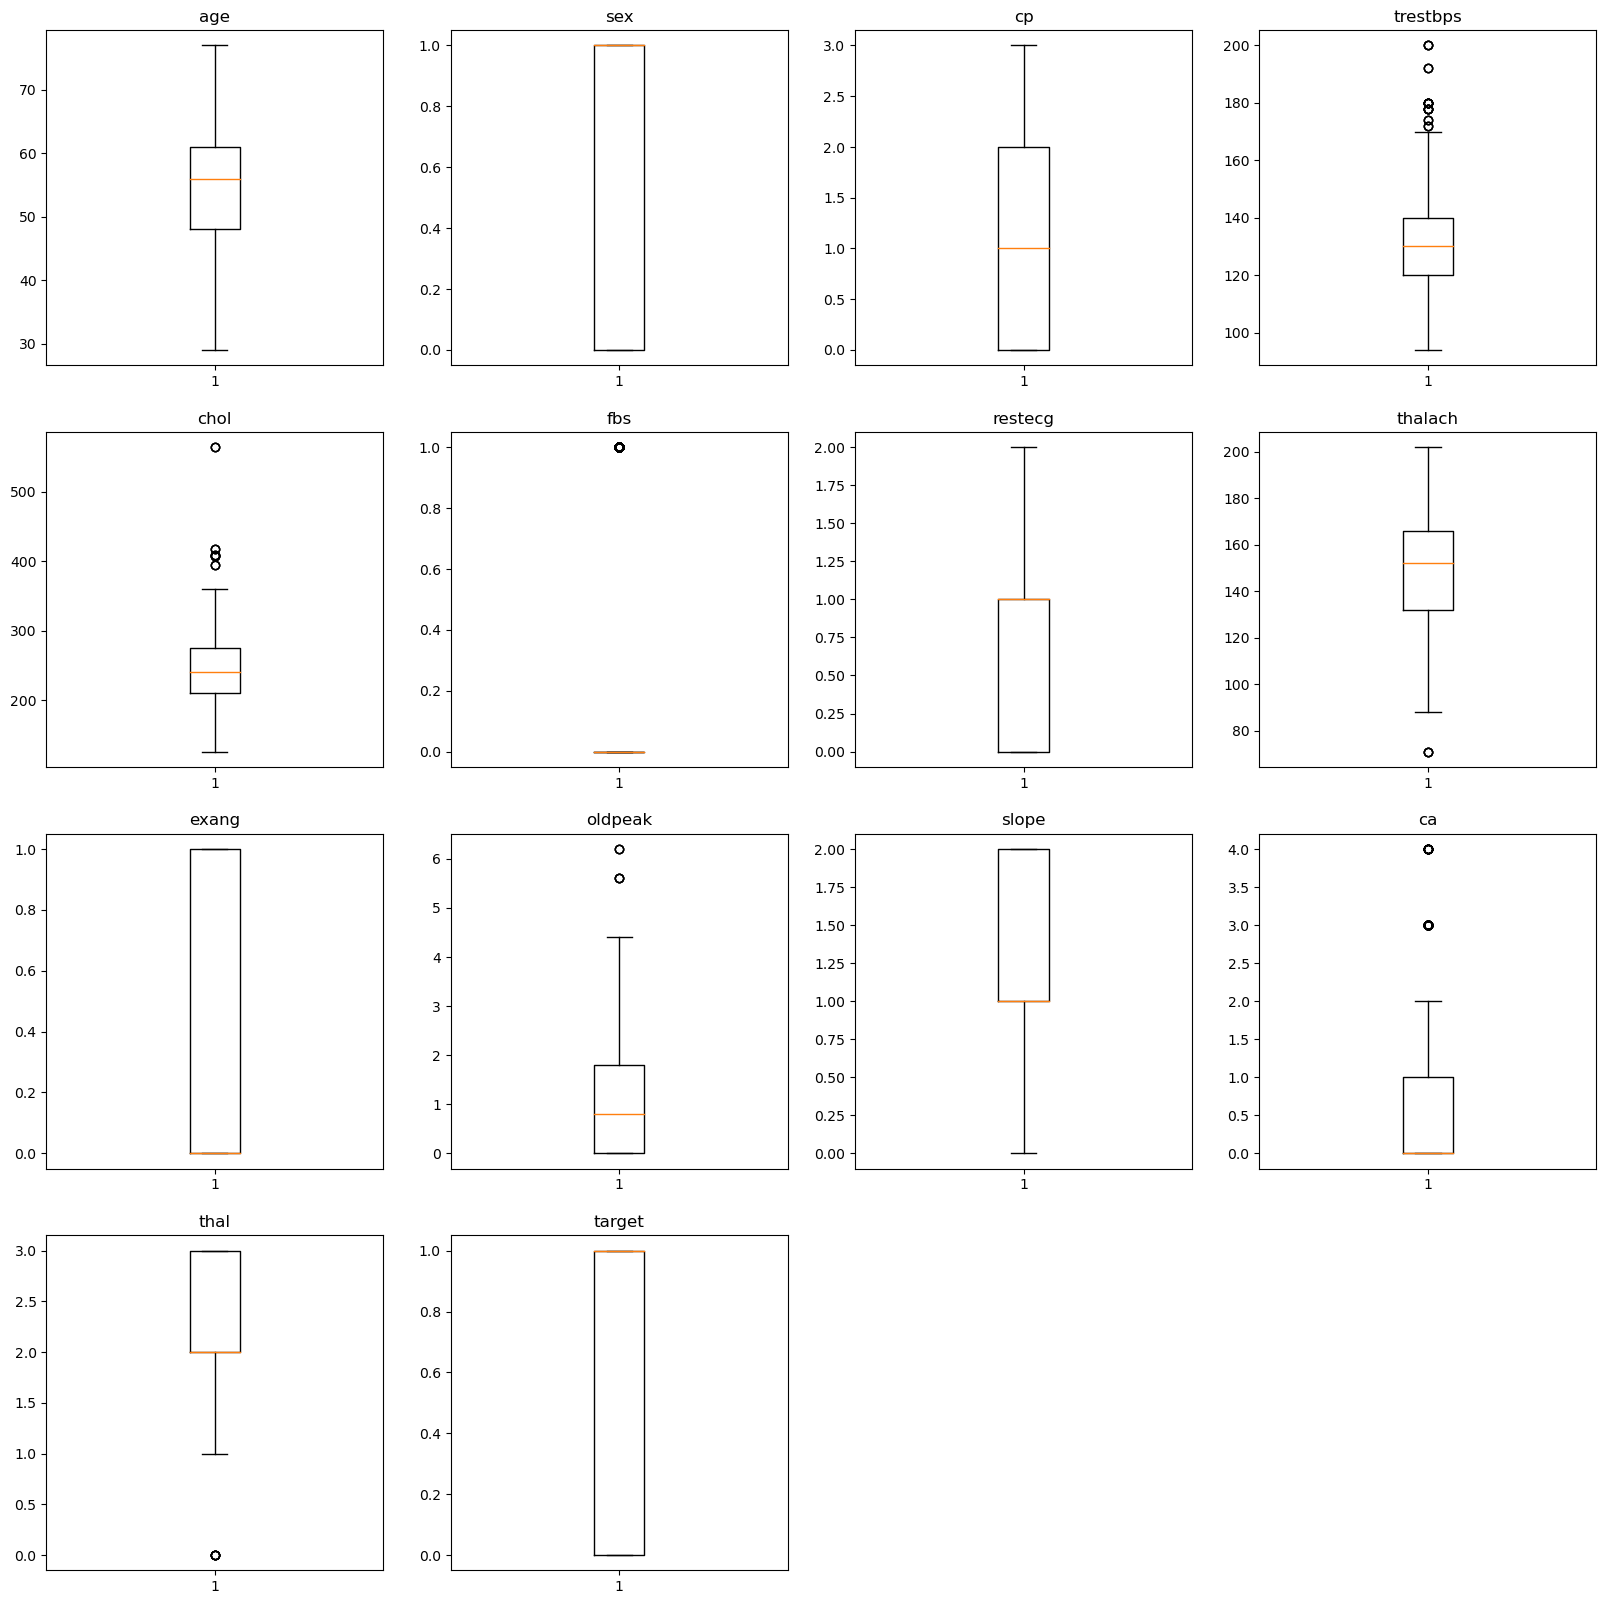

In [180]:
x = 1 
plt.figure(figsize = (20, 20))
for i in df.columns:
    plt.subplot(4, 4, x)
    plt.boxplot(df[i])
    plt.title(i)
    x = x+1
    

Maximum number of outliers can be seen in the column 'trestbps'.

Removing outliers from 'trestbps' column.

In [181]:
q1 = df['trestbps'].quantile(q = 0.25)
q3 = df["trestbps"].quantile(q = 0.75)
IQR = q3 - q1

IQR_lower_limit = int(q1 - (1.5*IQR))
IQR_upper_limit = int(q3 + (1.5*IQR))

print("Upper limit of IQR:",IQR_upper_limit)
print("Lower limit of IQR:",IQR_lower_limit)

cleaned_data = df[df["trestbps"]<IQR_upper_limit]

Upper limit of IQR: 170
Lower limit of IQR: 90


{'whiskers': [<matplotlib.lines.Line2D at 0x2344a7b9410>,
 'caps': [<matplotlib.lines.Line2D at 0x2344b2bb810>,
 'boxes': [<matplotlib.lines.Line2D at 0x2344a7baed0>],
 'medians': [<matplotlib.lines.Line2D at 0x2344afcb310>],
 'fliers': [<matplotlib.lines.Line2D at 0x2344a7b9a90>],
 'means': []}

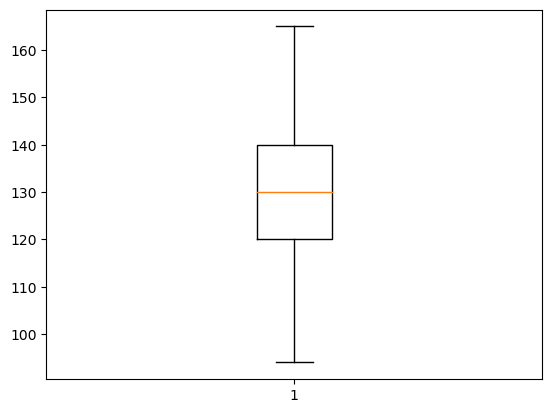

In [182]:
plt.boxplot(cleaned_data["trestbps"])

In [183]:
cleaned_data.shape

(980, 14)

So now there are only 980 rows left in the dataset after clearing the outliers and the 14 columns as they were.

In [184]:
cat_values.remove('target')
cleanded_data = pd.get_dummies(cleaned_data, columns=cat_values)

Train - Test Split

In [185]:
X = cleaned_data.drop(columns = 'target')
y = cleaned_data['target']

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

Scaling

In [187]:
sc = StandardScaler()
X_train[conti_values] = sc.fit_transform(X_train[conti_values])
X_test[conti_values] = sc.transform(X_test[conti_values])

Applying Logistic Regression

In [188]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [189]:
y_pred_test = logreg.predict(X_test)

In [190]:
lr_acc_score=accuracy_score(y_test, y_pred_test)
lr_acc_score

0.8724489795918368

In [191]:
confusion_matrix(y_test, y_pred_test)

array([[84, 11],
       [14, 87]], dtype=int64)

ROC_AUC_SCORE AND ROC_CURVE

In [192]:
roc_score = roc_auc_score(y_test, y_pred_test)
roc_score

0.8727983324648254

In [193]:
tpr, fpr, thresholds = roc_curve(y_test, y_pred_test)

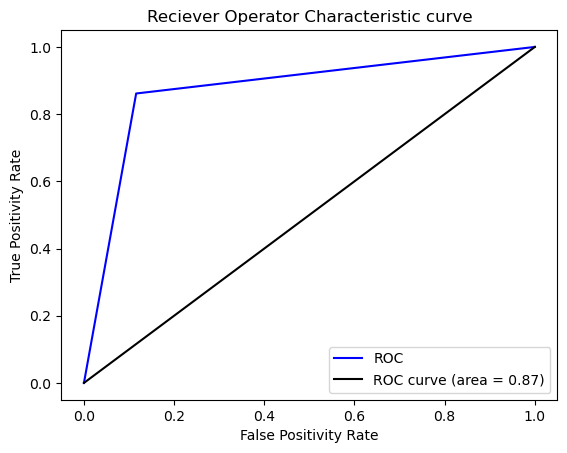

In [194]:
plt.plot(tpr, fpr, color = 'blue', label = 'ROC')
plt.plot([0,1],[0,1],color = 'black', label = 'ROC curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("Reciever Operator Characteristic curve")
plt.legend()
plt.show()

In [195]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_acc_score = accuracy_score(y_test, nbpred)
print(nb_acc_score)



0.8418367346938775


In [196]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print(rf_acc_score)

0.9489795918367347


In [197]:
m4= 'K-Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print(knn_acc_score)

0.8622448979591837


In [198]:
m5 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print(dt_acc_score)

0.9336734693877551


In [199]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.244898
1,Naive Bayes,84.183673
2,Random Forest,94.897959
3,K-Nearest Neighbour,86.224490
4,Decision Tree,93.367347


Over all the Machine Learning Algorithms, Decision Tree(93.88 %) and Random Forest(92.86 %) Algorithm gives us the best Accuracy.